<center><h3> Домашнее задание 6: линейная регрессия и корреляция
данных </h3></center>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [53]:
data = pd.read_csv("games.csv")
data = data.set_index("Name")
data.index.name = None
df = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Year"]]
df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
Wii Sports,41.49,29.02,3.77,8.46,2006.0
Super Mario Bros.,29.08,3.58,6.81,0.77,1985.0
Mario Kart Wii,15.85,12.88,3.79,3.31,2008.0
Wii Sports Resort,15.75,11.01,3.28,2.96,2009.0
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,1996.0
...,...,...,...,...,...
Crash Bandicoot 2: Cortex Strikes Back,3.78,2.17,1.31,0.31,1997.0
Super Mario Bros. 2,5.39,1.18,0.70,0.19,1988.0
Super Smash Bros. for Wii U and 3DS,3.24,1.35,2.42,0.43,2014.0
Call of Duty: World at War,4.79,1.90,0.00,0.69,2008.0


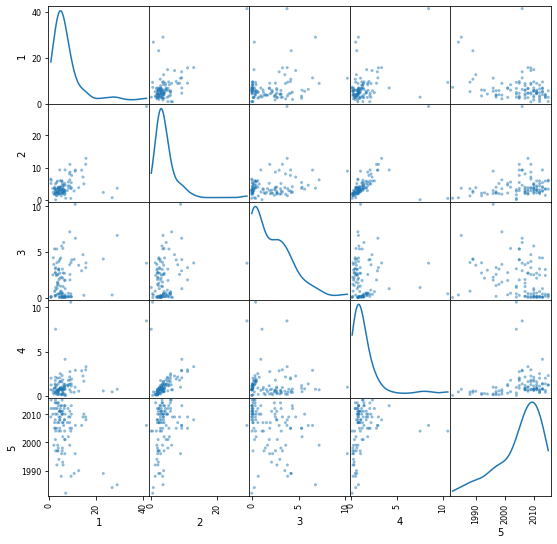

In [54]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.set_axis([1, 2, 3, 4, 5], axis=1), alpha=0.5, diagonal='kde', figsize=(9, 9))

Выберем два признака из данных с более менее «линейным» полем рассеяния:

Видно, что корреляция продаж с 5 признаком (годом) в некоторых случаях присутствует, но небольшая, поэтому не будем его использовать. Предлагаю выбрать 2 и 4 признак: продажи в Европе и продажи в других регионах (не в США и не в Японии), потому что видна некая корреляция и линейная зависимость, в остальных признаках она слишком слабая.

In [61]:
y = np.array(df.iloc[:, 3])
x = np.array(df.iloc[:, 1])

Посмотрим зависимость продаж в остальных регионах от количества продаж в Европе:

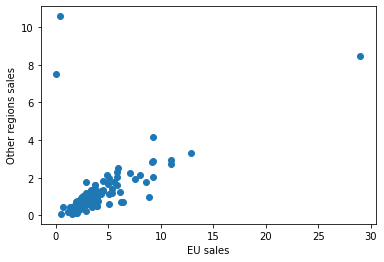

In [62]:
plt.scatter(x, y)
plt.ylabel('Other regions sales')
plt.xlabel('EU sales')
plt.show()

In [63]:
a = np.sum((y - y.mean()) * x)/np.sum((x - x.mean()) * x)
b = y.mean() - a*x.mean()
print('Regression coefficient: %.3f' % a)
print('Intercept: %.3f' % b)

Regression coefficient: 0.225
Intercept: 0.371


Построим уравнение линейно регрессии одного признака через другой:

In [64]:
y_pred = a*x + b

In [67]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, None], y)

LinearRegression()

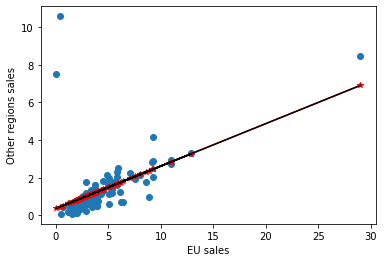

In [73]:
plt.scatter(x, y)
plt.plot(x, model.predict(x[:, None]), color='red', marker='*')
plt.plot(x, y_pred, color='black')
plt.ylabel('Other regions sales')
plt.xlabel('EU sales')
plt.show()

Построили линейную регрессию, видим, что наше уравнение совпадает с моделью из sklearn.

In [76]:
N = len(x)
coef = np.sum((y - y.mean()) * (x - x.mean())) / N / (x.std() * y.std())
print("Correlation coefficient: %.3f" % coef)
print("Determination coefficient: %.3f" % coef ** 2)

Correlation coefficient: 0.507
Determination coefficient: 0.257


Только 25% дисперсии признака $y$ учтено линейной регрессией. Действительно, видим на графике некие выбросы.

Возьмём 4 случайных объекта из выборки, посчитаем предсказание признака У через признак Х для них:

In [84]:
index = np.random.choice(np.arange(N), 4, replace=False)
x_ix = x[index]
y_true_ix = y[index]
y_pred_ix = y_pred[index]
errors = (y_true_ix - y_pred_ix) / y_true_ix

In [92]:
pd.DataFrame({'x': x_ix, 'y predicted': y_pred_ix, 'y true': y_true_ix, 'Error': errors}).round(2)

,x,y predicted,y true,Error
0,3.07,1.06,0.63,-0.69
1,2.17,0.86,0.31,-1.77
2,1.89,0.80,0.16,-3.98
3,3.11,1.07,0.98,-0.09


Видим, что модель для таких данных не очень хорошо предсказывает продажи в остальных регионах. На последнем объекте почти точно, но на некоторых объектах очень большие ошибки.

In [101]:
error_average = np.mean(np.abs(y - y_pred) / y)
print("Средняя относительная ошибка " + str((error_average * 100).round(2)) + "%")

Средняя относительная ошибка 82.36%


Ошибка большая. Можно сделать вывод, что не стоит с помощью данной модели предсказывать продажи в остальных регионах с помощью количества продаж в Европе. Действительно, по данным видим, что некоторые игры имеют успех только в Европе или только в остальных регионах.

Коэффициент детерминации был небольшой, поэтому средняя относительная ошибка очень высокая, так как плохо предсказываются данные для некоторых объектов, которые по количеству продаж сильно отклоняются от средних.